In [1]:
cd /orange/adamginsburg/jwst/brick/

/blue/adamginsburg/adamginsburg/jwst/brick


In [2]:
%matplotlib inline

In [3]:
basepath = '/orange/adamginsburg/jwst/brick/'

In [4]:
%run $basepath/analysis/analysis_setup.py

/orange/adamginsburg/jwst/brick//reduction/filtering.py:20: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
Set OBSGEO-B to   -20.631897 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526059356.900 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-08-28T03:05:32.473' from MJD-AVG.
Set DATE-END to '2022-08-28T03:34:03.557' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.651775 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526292809.682 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [5]:
%run $basepath/analysis/selections.py --module=nrca

Selecting module nrca
1233 saturated in near_saturated_f212n_f212n
171 saturated in near_saturated_f466n_f466n
530 saturated in near_saturated_f405n_f405n
1060 saturated in near_saturated_f187n_f187n
7632 saturated in near_saturated_f182m_f182m
9717 near saturated out of 289206.  That leaves 279489 not near unsaturated
126 saturated in replaced_saturated_f212n
48 saturated in replaced_saturated_f466n
178 saturated in replaced_saturated_f405n
55 saturated in replaced_saturated_f187n
222 saturated in replaced_saturated_f182m
1312 saturated out of 289206.  That leaves 287894 unsaturated
Filter f410m has qf=61929, spread=68647, fracflux=47462 ok, totaling 45237.  There are 289206 total, of which 226777 are masked and 62429 are unmasked. qfmasksum=218116, inverse=71090.
Filter f212n has qf=119077, spread=123906, fracflux=101766 ok, totaling 101274.  There are 289206 total, of which 167569 are masked and 121637 are unmasked. qfmasksum=164843, inverse=124363.
Filter f466n has qf=46231, spread

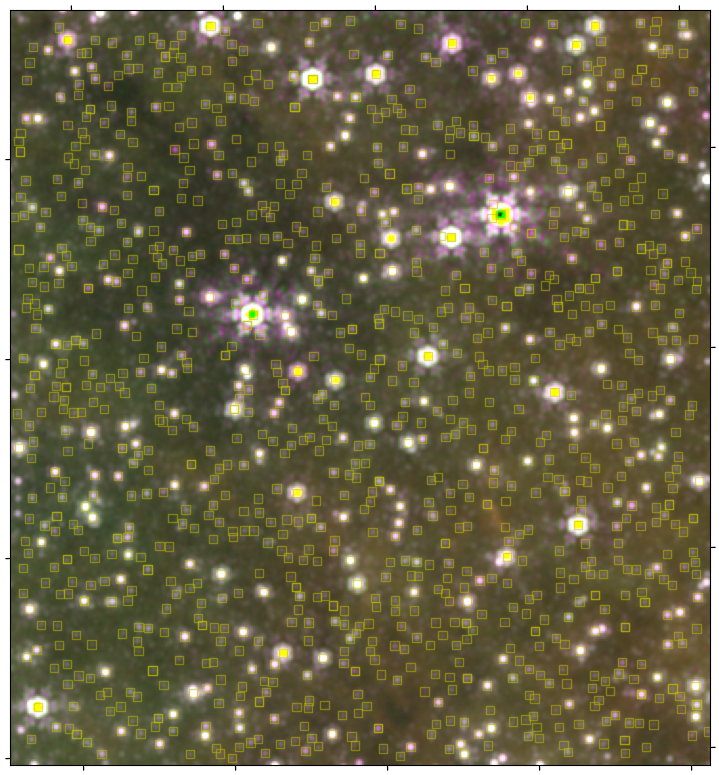

In [6]:
mask = reg.to_pixel(wwi).to_mask()
slcs,_ = mask.get_overlap_slices(img.shape[:2])
#co = np.array([mask.cutout(img[:,:,ii]) for ii in range(img.shape[2])])
co = img[slcs[0], slcs[1], :]

pl.figure(figsize=(10,10))
ax = pl.subplot(projection=wwi[slcs])
pl.imshow(co)

crds = basetable['skycoord_f410m']
sel = reg.contains(crds, ww410)
xx,yy = ww410[slcs].world_to_pixel(crds[sel])

colorby = basetable['flux_f410m']
colorby = basetable['mag_ab_f410m'] - basetable['mag_ab_f405n']
#sel = sel & (colorby > 2)
sel &= basetable['sep_f405n'].quantity < 0.1*u.arcsec

scat = ax.scatter(crds.ra[sel], crds.dec[sel], transform=ax.get_transform('world'),
                  edgecolor='y', facecolor='none', marker='s',
                  alpha=0.5)#r'$\rightarrow$')
                  #c=colorby[sel],
                  #norm=simple_norm(colorby[sel], stretch='linear',), cmap='jet')
#pl.draw()
#colors = scat.get_facecolors()
#scat.set_edgecolors(colors)
#scat.set_facecolors('none')

(25.0, 14.0)

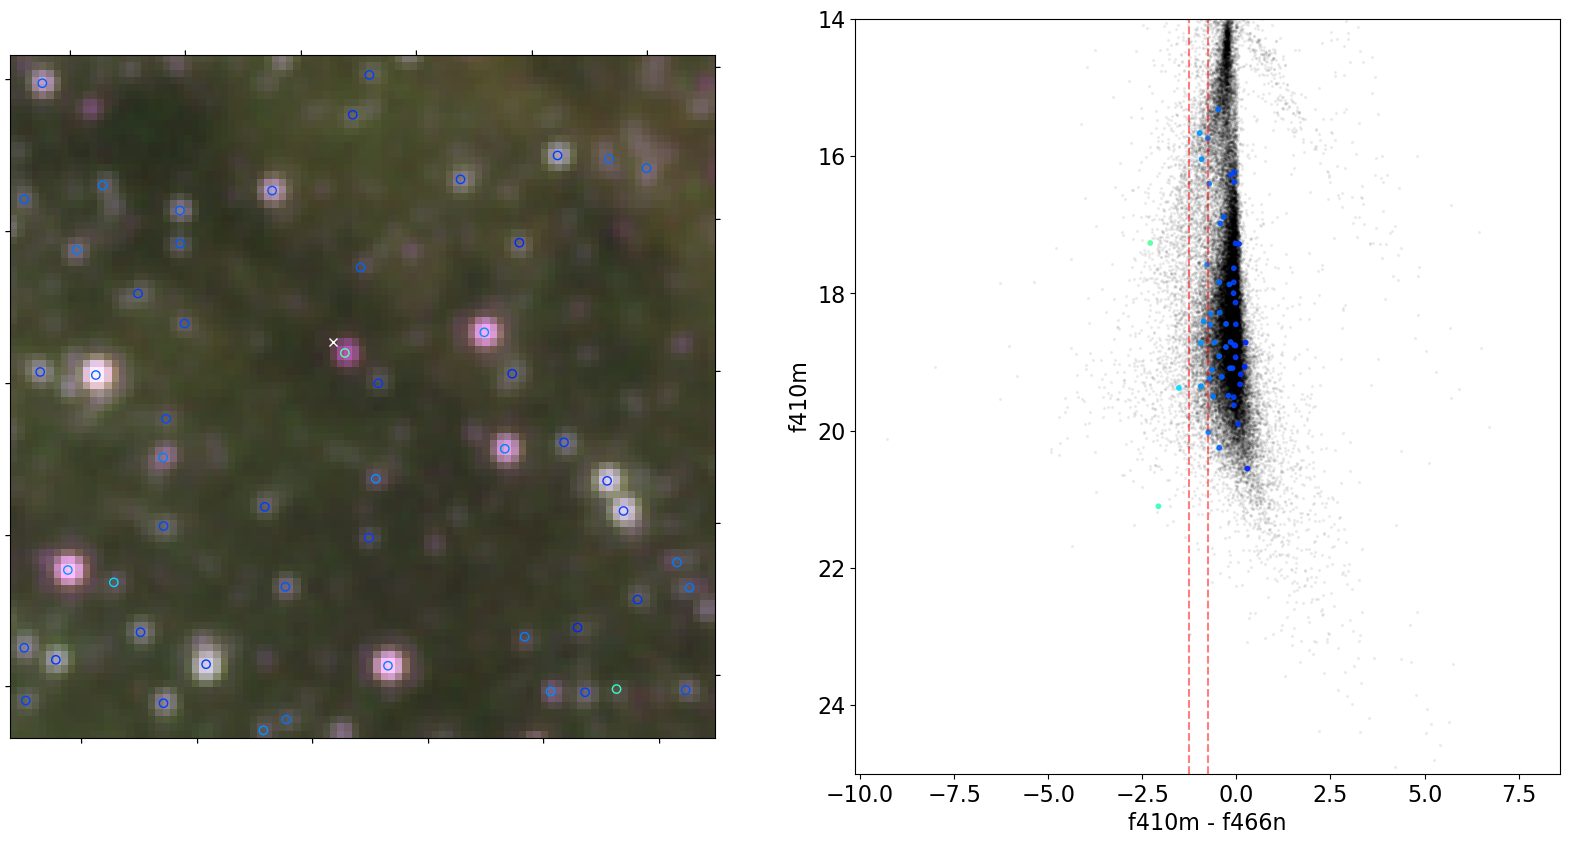

In [7]:
mask = regzoom.to_pixel(wwi).to_mask()
slcs,_ = mask.get_overlap_slices(img.shape[:2])
#co = np.array([mask.cutout(img[:,:,ii]) for ii in range(img.shape[2])])
co = img[slcs[0], slcs[1], :]

pl.figure(figsize=(20,10))
ax = pl.subplot(1,2,1, projection=wwi[slcs])
pl.imshow(co)

crds = basetable['skycoord_f410m']
sel = regzoom.contains(crds, ww410)
sel &= basetable['sep_f405n'].quantity < 0.1*u.arcsec
xx,yy = ww410[slcs].world_to_pixel(crds[sel])

colorby = basetable['flux_f410m']
colorby = basetable['mag_ab_f410m'] - basetable['mag_ab_f405n']
colorby = basetable['mag_ab_f410m'] - basetable['mag_ab_f466n']
#sel = sel & (colorby < -2)

scat = ax.scatter(crds.ra[sel], crds.dec[sel], transform=ax.get_transform('world'),
                  #edgecolor='r', facecolor='none', marker='s')#r'$\rightarrow$')
                  c=colorby[sel],
                  norm=simple_norm(colorby[sel], stretch='asinh', min_cut=-4, max_cut=3), cmap='jet_r')
pl.draw()
colors = scat.get_facecolors()
scat.set_edgecolors(colors)
scat.set_facecolors('none')
#pl.colorbar(mappable=scat)
ax.axis()
pl.plot(44,54, 'wx')
wwi[slcs].pixel_to_world(45,55)

ax2 = pl.subplot(1,2,2)
ax2.scatter(basetable['mag_ab_f410m'] - basetable['mag_ab_f466n'], basetable['mag_ab_f410m'], s=2, alpha=0.05, c='k')
ax2.scatter((basetable['mag_ab_f410m'] - basetable['mag_ab_f466n'])[sel], basetable['mag_ab_f410m'][sel], s=10, alpha=0.9,
            c=colorby[sel],
            norm=simple_norm(colorby[sel], stretch='asinh', min_cut=-4, max_cut=3), cmap='jet_r'
           )
ax2.axvline(-0.75, linestyle='--', color='r', alpha=0.5)
ax2.axvline(-1.25, linestyle='--', color='r', alpha=0.5)
ax2.set_ylim(pl.ylim()[::-1])
ax2.set_xlabel("f410m - f466n")
ax2.set_ylabel("f410m")
ax2.set_ylim(25,14)

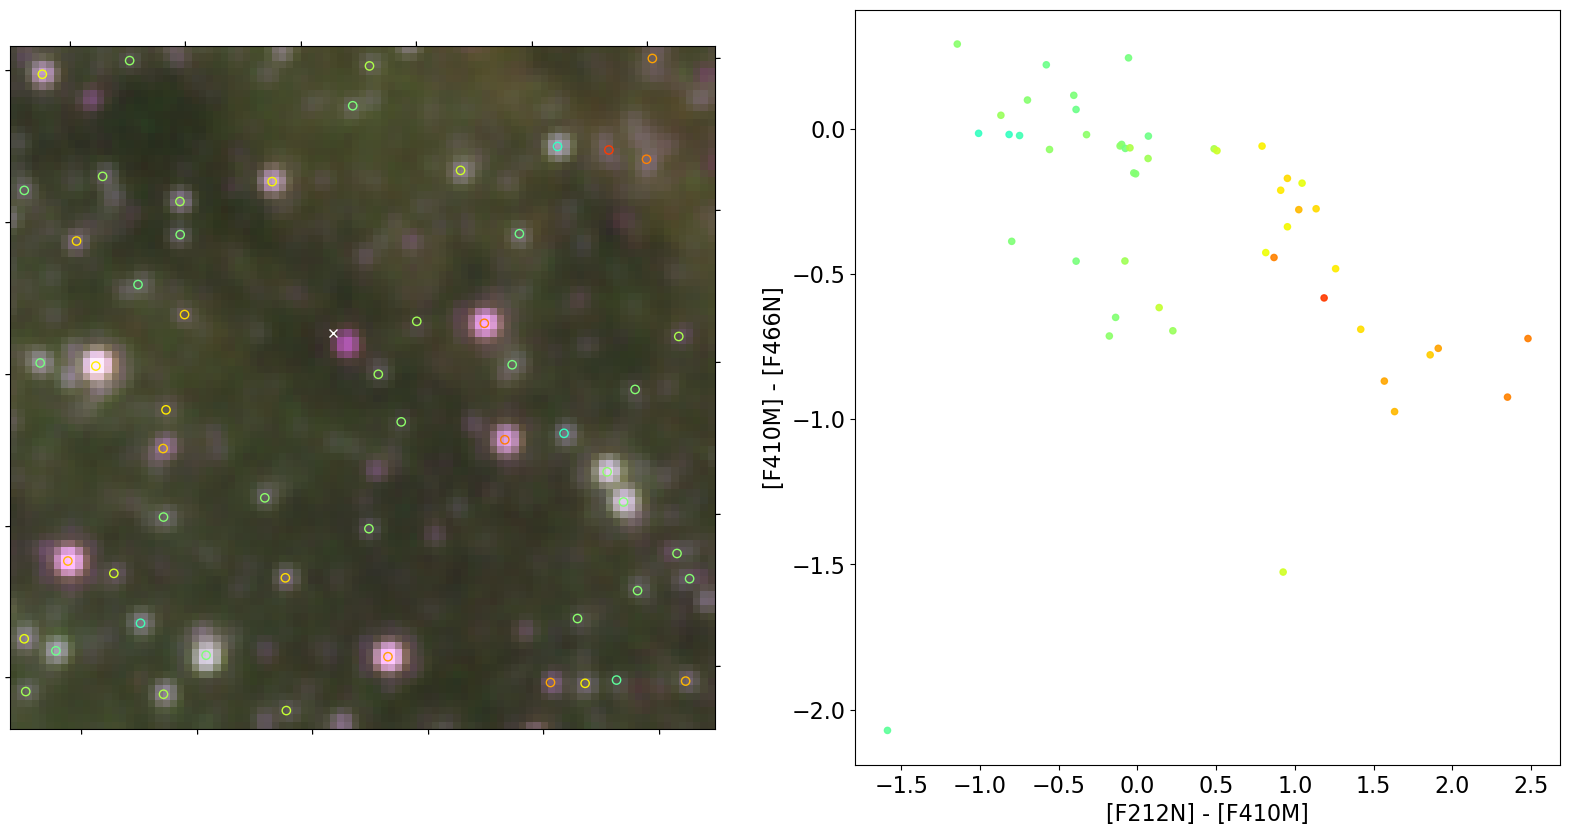

In [8]:
mask = regzoom.to_pixel(wwi).to_mask()
slcs,_ = mask.get_overlap_slices(img.shape[:2])
#co = np.array([mask.cutout(img[:,:,ii]) for ii in range(img.shape[2])])
co = img[slcs[0], slcs[1], :]

pl.figure(figsize=(20,10))
ax = pl.subplot(1,2,1, projection=wwi[slcs])
pl.imshow(co)

crds = basetable['skycoord_f410m']
sel = regzoom.contains(crds, ww410)
sel &= basetable['sep_f405n'].quantity < 0.1*u.arcsec
xx,yy = ww410[slcs].world_to_pixel(crds[sel])

#colorby = basetable['flux_f410m']
#colorby = basetable['mag_ab_f410m'] - basetable['mag_ab_f405n']
#colorby = basetable['mag_ab_f410m'] - basetable['mag_ab_f466n']
colorby = basetable['mag_ab_f182m'] - basetable['mag_ab_f212n']
#sel = sel & (colorby < -2)

colornorm = simple_norm(colorby[sel], stretch='asinh', min_cut=0, max_cut=5)

scat = ax.scatter(crds.ra[sel], crds.dec[sel], transform=ax.get_transform('world'),
                  #edgecolor='r', facecolor='none', marker='s')#r'$\rightarrow$')
                  c=colorby[sel],
                  norm=colornorm, cmap='jet')
pl.draw()
colors = scat.get_facecolors()
scat.set_edgecolors(colors)
scat.set_facecolors('none')
#pl.colorbar(mappable=scat)
ax.axis()
pl.plot(44,54, 'wx')
wwi[slcs].pixel_to_world(45,55)

ax2 = pl.subplot(1,2,2)
#ax2.scatter(basetable['mag_ab_f410m'] - basetable['mag_ab_f466n'], basetable['mag_ab_f410m'], s=2, alpha=0.05, c='k')
ax2.scatter((basetable['mag_ab_f212n'] - basetable['mag_ab_f410m'])[sel],
            (basetable['mag_ab_f410m'] - basetable['mag_ab_f466n'])[sel],
            s=20, alpha=0.9,
            c=colorby[sel],
            norm=colornorm, cmap='jet'
           )
#ax2.axvline(-0.75, linestyle='--', color='r', alpha=0.5)
#ax2.axvline(-1.25, linestyle='--', color='r', alpha=0.5)
#ax2.set_ylim(pl.ylim()[::-1])
ax2.set_ylabel("[F410M] - [F466N]")
ax2.set_xlabel("[F212N] - [F410M]");
#ax2.set_ylim(25,14)

# 410-466 color is anticorrelated with extinction

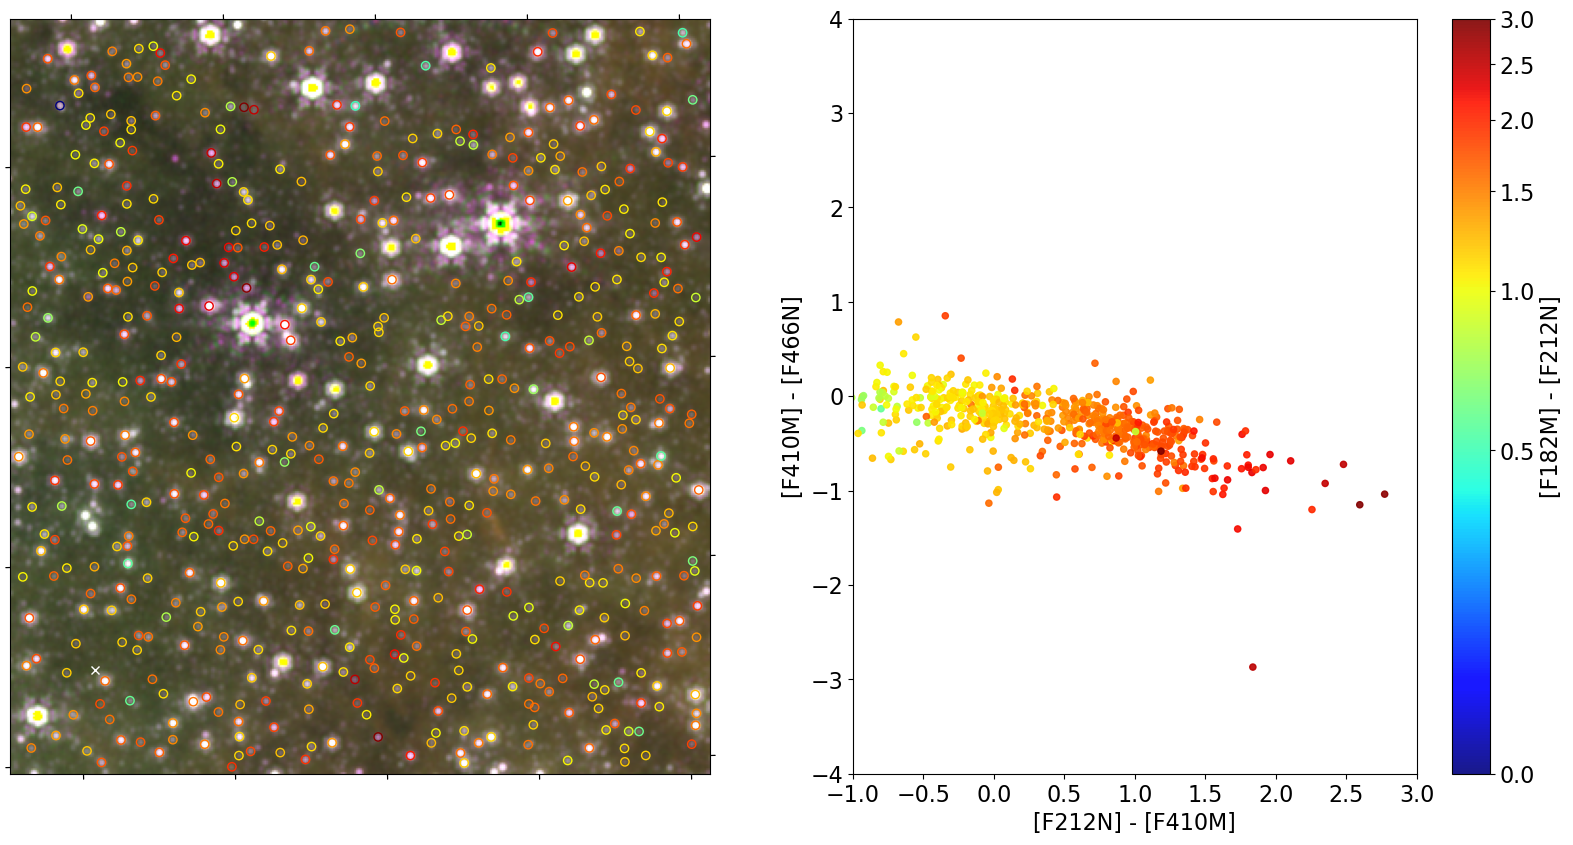

In [9]:
mask = reg.to_pixel(wwi).to_mask()
slcs,_ = mask.get_overlap_slices(img.shape[:2])
#co = np.array([mask.cutout(img[:,:,ii]) for ii in range(img.shape[2])])
co = img[slcs[0], slcs[1], :]

pl.figure(figsize=(20,10))
ax = pl.subplot(1,2,1, projection=wwi[slcs])
pl.imshow(co)

crds = basetable['skycoord_f410m']
sel = reg.contains(crds, ww410)
sel &= basetable['sep_f405n'].quantity < 0.1*u.arcsec
sel &= long_good & (~any_saturated)
xx,yy = ww410[slcs].world_to_pixel(crds[sel])

#colorby = basetable['flux_f410m']
#colorby = basetable['mag_ab_f410m'] - basetable['mag_ab_f405n']
#colorby = basetable['mag_ab_f410m'] - basetable['mag_ab_f466n']
colorby = basetable['mag_ab_f182m'] - basetable['mag_ab_f212n']
#sel = sel & (colorby < -2)

colornorm = simple_norm(colorby[sel], stretch='asinh', min_cut=0, max_cut=3)

scat = ax.scatter(crds.ra[sel], crds.dec[sel], transform=ax.get_transform('world'),
                  #edgecolor='r', facecolor='none', marker='s')#r'$\rightarrow$')
                  c=colorby[sel],
                  norm=colornorm, cmap='jet')
pl.draw()
colors = scat.get_facecolors()
scat.set_edgecolors(colors)
scat.set_facecolors('none')
#pl.colorbar(mappable=scat)
ax.axis()
pl.plot(44,54, 'wx')
wwi[slcs].pixel_to_world(45,55)

ax2 = pl.subplot(1,2,2)
#ax2.scatter(basetable['mag_ab_f410m'] - basetable['mag_ab_f466n'], basetable['mag_ab_f410m'], s=2, alpha=0.05, c='k')
sc = ax2.scatter((basetable['mag_ab_f212n'] - basetable['mag_ab_f410m'])[sel],
            (basetable['mag_ab_f410m'] - basetable['mag_ab_f466n'])[sel],
            s=20, alpha=0.9,
            c=colorby[sel],
            norm=colornorm, cmap='jet'
           )
cb = pl.colorbar(mappable=sc)
cb.set_label("[F182M] - [F212N]")
#ax2.axvline(-0.75, linestyle='--', color='r', alpha=0.5)
#ax2.axvline(-1.25, linestyle='--', color='r', alpha=0.5)
#ax2.set_ylim(pl.ylim()[::-1])
ax2.set_ylabel("[F410M] - [F466N]")
ax2.set_xlabel("[F212N] - [F410M]");
ax2.axis((-1,3,-4,4));

In [ ]:
# QF analysis
mask = reg.to_pixel(wwi).to_mask()
slcs,_ = mask.get_overlap_slices(img.shape[:2])
co = img[slcs[0], slcs[1], :]

pl.figure(figsize=(20,10))
ax = pl.subplot(1,2,1, projection=wwi[slcs])
pl.imshow(co)

crds = basetable['skycoord_f410m']
sel = reg.contains(crds, ww410)
sel &= basetable['sep_f405n'].quantity < 0.1*u.arcsec
#sel &= long_good & (~any_saturated)
xx,yy = ww410[slcs].world_to_pixel(crds[sel])

colorby = basetable['qf_f410m']

colornorm = simple_norm(colorby[sel], min_cut=0.5,)

scat = ax.scatter(crds.ra[sel], crds.dec[sel], transform=ax.get_transform('world'),
                  #edgecolor='r', facecolor='none', marker='s')#r'$\rightarrow$')
                  c=colorby[sel],
                  norm=colornorm, cmap='jet')
pl.draw()
colors = scat.get_facecolors()
scat.set_edgecolors(colors)
scat.set_facecolors('none')
#pl.colorbar(mappable=scat)
ax.axis()
pl.plot(44,54, 'wx')
wwi[slcs].pixel_to_world(45,55)

ax2 = pl.subplot(1,2,2)
#ax2.scatter(basetable['mag_ab_f410m'] - basetable['mag_ab_f466n'], basetable['mag_ab_f410m'], s=2, alpha=0.05, c='k')
sc = ax2.scatter((basetable['mag_ab_f212n'] - basetable['mag_ab_f410m'])[sel],
            (basetable['mag_ab_f410m'] - basetable['mag_ab_f466n'])[sel],
            s=20, alpha=0.9,
            c=colorby[sel],
            norm=colornorm, cmap='jet'
           )
cb = pl.colorbar(mappable=sc)
cb.set_label("QF 410")
#ax2.axvline(-0.75, linestyle='--', color='r', alpha=0.5)
#ax2.axvline(-1.25, linestyle='--', color='r', alpha=0.5)
#ax2.set_ylim(pl.ylim()[::-1])
ax2.set_ylabel("[F410M] - [F466N]")
ax2.set_xlabel("[F212N] - [F410M]");
ax2.axis((-1,3,-4,4));

In [ ]:
# ATTEMPT TO ID SOME JUNK

mask = reg.to_pixel(wwi).to_mask()
slcs,_ = mask.get_overlap_slices(img.shape[:2])
#co = np.array([mask.cutout(img[:,:,ii]) for ii in range(img.shape[2])])
co = img[slcs[0], slcs[1], :]

pl.figure(figsize=(20,10))
ax = pl.subplot(1,2,1, projection=wwi[slcs])
pl.imshow(co)

crds = basetable['skycoord_f410m']
sel = reg.contains(crds, ww410)
sel &= basetable['sep_f405n'].quantity < 0.1*u.arcsec
sel &= (basetable['mag_ab_f410m'] - basetable['mag_ab_f466n'] > 1) | (basetable['mag_ab_f410m'] - basetable['mag_ab_f466n'] < -1)
xx,yy = ww410[slcs].world_to_pixel(crds[sel])

#colorby = basetable['flux_f410m']
#colorby = basetable['mag_ab_f410m'] - basetable['mag_ab_f405n']
#colorby = basetable['mag_ab_f410m'] - basetable['mag_ab_f466n']
colorby = basetable['mag_ab_f182m'] - basetable['mag_ab_f212n']
colorby = basetable['mag_ab_f410m'] - basetable['mag_ab_f466n']
#sel = sel & (colorby < -2)

colornorm = simple_norm(colorby[sel], stretch='asinh', min_cut=-5, max_cut=5)

scat = ax.scatter(crds.ra[sel], crds.dec[sel], transform=ax.get_transform('world'),
                  #edgecolor='r', facecolor='none', marker='s')#r'$\rightarrow$')
                  c=colorby[sel],
                  norm=colornorm, cmap='jet')
pl.draw()
colors = scat.get_facecolors()
scat.set_edgecolors(colors)
scat.set_facecolors('none')
#pl.colorbar(mappable=scat)
ax.axis()
pl.plot(44,54, 'wx')
wwi[slcs].pixel_to_world(45,55)

ax2 = pl.subplot(1,2,2)
#ax2.scatter(basetable['mag_ab_f410m'] - basetable['mag_ab_f466n'], basetable['mag_ab_f410m'], s=2, alpha=0.05, c='k')
sc = ax2.scatter((basetable['mag_ab_f212n'] - basetable['mag_ab_f410m'])[sel],
            (basetable['mag_ab_f410m'] - basetable['mag_ab_f466n'])[sel],
            s=20, alpha=0.9,
            c=colorby[sel],
            norm=colornorm, cmap='jet'
           )
cb = pl.colorbar(mappable=sc)
cb.set_label("[F410M] - [F466N]")
#ax2.axvline(-0.75, linestyle='--', color='r', alpha=0.5)
#ax2.axvline(-1.25, linestyle='--', color='r', alpha=0.5)
#ax2.set_ylim(pl.ylim()[::-1])
ax2.set_ylabel("[F410M] - [F466N]")
ax2.set_xlabel("[F212N] - [F410M]");
ax2.axis((-1,3,-4,4));
pl.suptitle("Try to ID 'junk' stars from the larger outliers\nSome of these are saturated in F410, but others show nothing obviously wrong");

In [ ]:
# Zoom OUT
co = img

pl.figure(figsize=(20,10))
ax = pl.subplot(1,2,1, projection=wwi)
pl.imshow(co)

crds = basetable['skycoord_f410m']
sel = basetable['sep_f405n'].quantity < 0.1*u.arcsec
sel &= (~any_saturated) & (any_good) & long_good
xx,yy = ww410.world_to_pixel(crds[sel])

#colorby = basetable['flux_f410m']
#colorby = basetable['mag_ab_f410m'] - basetable['mag_ab_f405n']
#colorby = basetable['mag_ab_f410m'] - basetable['mag_ab_f466n']
colorby = basetable['mag_ab_f182m'] - basetable['mag_ab_f212n']
#sel = sel & (colorby < -2)

colornorm = simple_norm(colorby[sel], stretch='asinh', min_cut=0, max_cut=3)

scat = ax.scatter(crds.ra[sel], crds.dec[sel], transform=ax.get_transform('world'),
                  #edgecolor='r', facecolor='none', marker='s')#r'$\rightarrow$')
                  c=colorby[sel],
                  s=1,
                  norm=colornorm, cmap='jet')
pl.draw()
colors = scat.get_facecolors()
scat.set_edgecolors(colors)
scat.set_facecolors('none')
ax.axis()

ax2 = pl.subplot(1,2,2)
#ax2.scatter(basetable['mag_ab_f410m'] - basetable['mag_ab_f466n'], basetable['mag_ab_f410m'], s=2, alpha=0.05, c='k')
sc = ax2.scatter((basetable['mag_ab_f212n'] - basetable['mag_ab_f410m'])[sel],
            (basetable['mag_ab_f410m'] - basetable['mag_ab_f466n'])[sel],
            s=10, alpha=0.5,
            c=colorby[sel],
            norm=colornorm, cmap='jet'
           )

cb = pl.colorbar(mappable=sc)
cb.set_label("[F182M] - [F212N]")
#ax2.axvline(-0.75, linestyle='--', color='r', alpha=0.5)
#ax2.axvline(-1.25, linestyle='--', color='r', alpha=0.5)
#ax2.set_ylim(pl.ylim()[::-1])
ax2.set_ylabel("[F410M] - [F466N]")
ax2.set_xlabel("[F212N] - [F410M]");
ax2.axis((-2,3,-4,4));

In [ ]:
co = img

pl.figure(figsize=(20,10))
ax = pl.subplot(1,2,1, projection=wwi)
pl.imshow(co)

crds = basetable['skycoord_f410m']
sel = basetable['sep_f405n'].quantity < 0.1*u.arcsec
sel &= long_good & ~any_saturated
xx,yy = ww410.world_to_pixel(crds[sel])

#colorby = basetable['flux_f410m']
colorby = basetable['mag_ab_f212n'] - basetable['mag_ab_f410m']
#sel = sel & (colorby < -2)

colornorm = simple_norm(colorby[sel], stretch='asinh', min_cut=-1.5, max_cut=3)

scat = ax.scatter(crds.ra[sel], crds.dec[sel], transform=ax.get_transform('world'),
                  #edgecolor='r', facecolor='none', marker='s')#r'$\rightarrow$')
                  c=colorby[sel],
                  s=1,
                  norm=colornorm, cmap='jet')
pl.draw()
colors = scat.get_facecolors()
scat.set_edgecolors(colors)
scat.set_facecolors('none')
ax.axis()

ax2 = pl.subplot(1,2,2)
#ax2.scatter(basetable['mag_ab_f410m'] - basetable['mag_ab_f466n'], basetable['mag_ab_f410m'], s=2, alpha=0.05, c='k')
sc = ax2.scatter((basetable['mag_ab_f187n'] - basetable['mag_ab_f182m'])[sel],
            (basetable['mag_ab_f405n'] - basetable['mag_ab_f410m'])[sel],
            s=10, alpha=0.5,
            c=colorby[sel],
            norm=colornorm, cmap='jet'
           )

cb = pl.colorbar(mappable=sc)
cb.set_label("[F212N] - [F410M]")
#ax2.axvline(-0.75, linestyle='--', color='r', alpha=0.5)
#ax2.axvline(-1.25, linestyle='--', color='r', alpha=0.5)
#ax2.set_ylim(pl.ylim()[::-1])
ax2.set_ylabel("[F405N] - [F410M]")
ax2.set_xlabel("[F187N] - [F182M]");
ax2.axis((-0.35,0.05,-0.15,0.3));

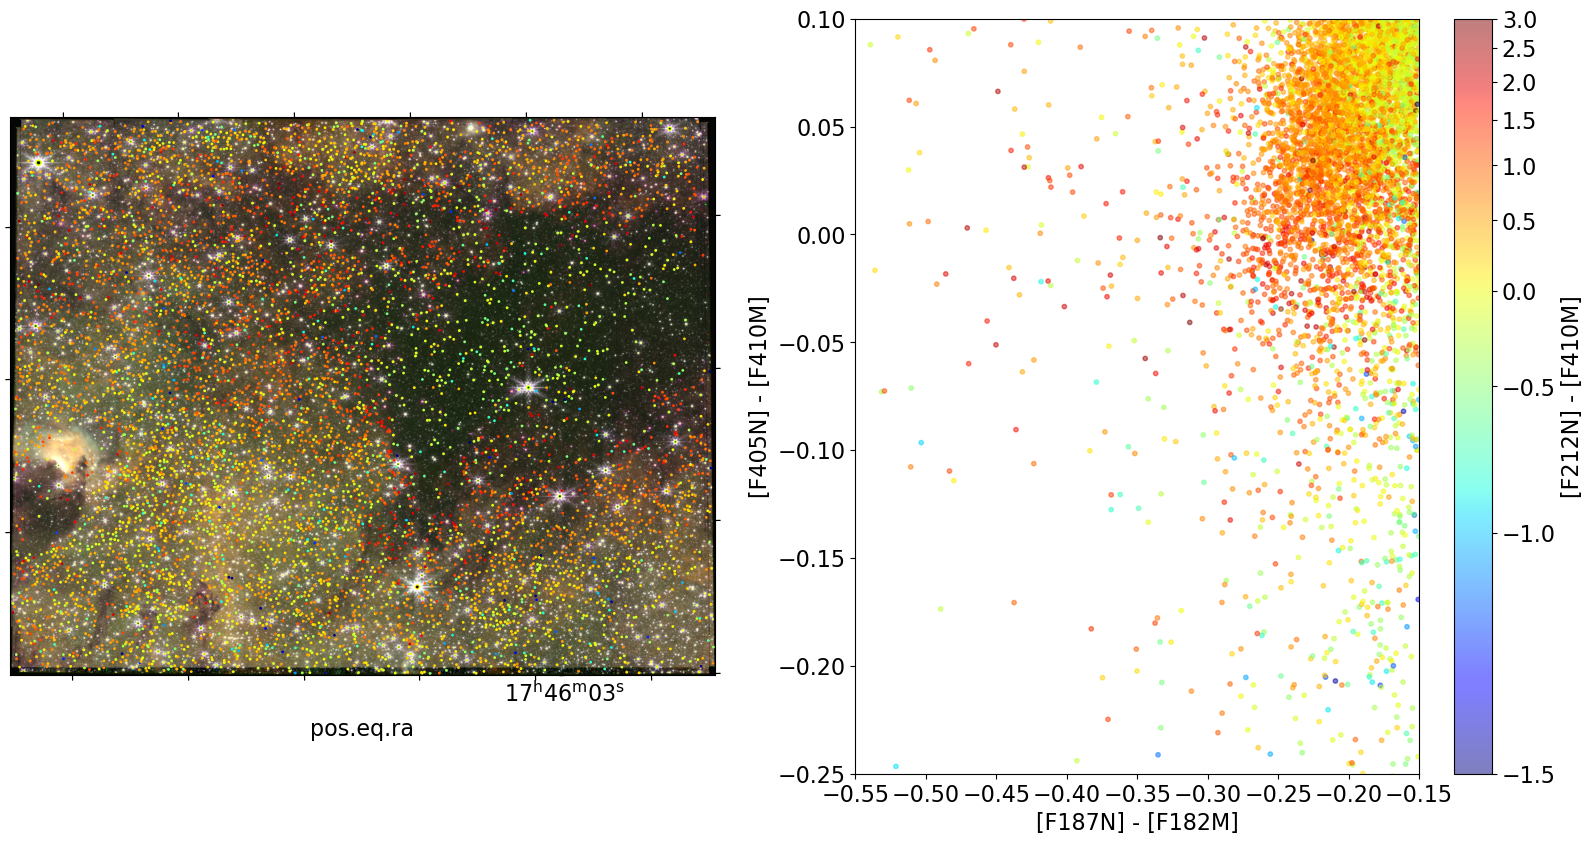

In [14]:
co = img

pl.figure(figsize=(20,10))
ax = pl.subplot(1,2,1, projection=wwi)
pl.imshow(co)

crds = basetable['skycoord_f410m']
sel = basetable['sep_f405n'].quantity < 0.1*u.arcsec
sel &= long_good & ~any_saturated
sel &= (basetable['mag_ab_f187n'] - basetable['mag_ab_f182m']) < -0.15
sel &= (basetable['mag_ab_f405n'] - basetable['mag_ab_f410m']) < 0.1
xx,yy = ww410.world_to_pixel(crds[sel])

#colorby = basetable['flux_f410m']
colorby = basetable['mag_ab_f212n'] - basetable['mag_ab_f410m']
#sel = sel & (colorby < -2)

colornorm = simple_norm(colorby[sel], stretch='asinh', min_cut=-1.5, max_cut=3)

scat = ax.scatter(crds.ra[sel], crds.dec[sel], transform=ax.get_transform('world'),
                  #edgecolor='r', facecolor='none', marker='s')#r'$\rightarrow$')
                  c=colorby[sel],
                  s=1,
                  norm=colornorm, cmap='jet')
pl.draw()
colors = scat.get_facecolors()
scat.set_edgecolors(colors)
scat.set_facecolors('none')
ax.axis()

ax2 = pl.subplot(1,2,2)
#ax2.scatter(basetable['mag_ab_f410m'] - basetable['mag_ab_f466n'], basetable['mag_ab_f410m'], s=2, alpha=0.05, c='k')
sc = ax2.scatter((basetable['mag_ab_f187n'] - basetable['mag_ab_f182m'])[sel],
            (basetable['mag_ab_f405n'] - basetable['mag_ab_f410m'])[sel],
            s=10, alpha=0.5,
            c=colorby[sel],
            norm=colornorm, cmap='jet'
           )

cb = pl.colorbar(mappable=sc)
cb.set_label("[F212N] - [F410M]")
#ax2.axvline(-0.75, linestyle='--', color='r', alpha=0.5)
#ax2.axvline(-1.25, linestyle='--', color='r', alpha=0.5)
#ax2.set_ylim(pl.ylim()[::-1])
ax2.set_ylabel("[F405N] - [F410M]")
ax2.set_xlabel("[F187N] - [F182M]");
ax2.axis((-0.55,-0.15,-0.25,0.1));